In [1]:
import ROOT as r
r.EnableImplicitMT()

import matplotlib.pyplot as plt

import mplhep as hep
hep.style.use(hep.style.CMS)

In [2]:
r.gInterpreter.Declare(
"""
std::string binning(unsigned int slot, const ROOT::RDF::RSampleInfo &id){
    if (id.Contains("100To200")) return std::string("100To200");
    if (id.Contains("200To400")) return std::string("200To400");
    if (id.Contains("400To600")) return std::string("400To600");
    if (id.Contains("600To800")) return std::string("600To800");
    if (id.Contains("800To1200")) return std::string("800To1200");
    if (id.Contains("1200To2500")) return std::string("1200To2500");
    if (id.Contains("2500ToInf")) return std::string("2500ToInf");
    return std::string("Unknown");
}
""")

True

In [3]:
df = r.RDF.Experimental.FromSpec("wjets.json")

df = df.DefinePerSample("sample_type", 'rdfsampleinfo_.GetS("sample_type")')
df = df.DefinePerSample("sample_year", 'rdfsampleinfo_.GetS("sample_year")')
df = df.DefinePerSample("xsec", 'rdfsampleinfo_.GetD("xsec")')
df = df.DefinePerSample("nevents", 'rdfsampleinfo_.GetD("nevents")')
df = df.DefinePerSample("lumi", 'rdfsampleinfo_.GetD("lumi")')
df = df.DefinePerSample("binning", 'binning(rdfslot_, rdfsampleinfo_)')

In [4]:
df = df.Define("weight", "xsec * lumi / nevents * genWeight")

In [9]:
lhe100To200 = df.Filter("sample_year == \"2018\"").Filter("binning == \"100To200\"").Histo1D(("LHE_HT", "LHE_HT", 4, 100, 200), "LHE_HT", "weight")
lhe200To400 = df.Filter("sample_year == \"2018\"").Filter("binning == \"200To400\"").Histo1D(("LHE_HT", "LHE_HT", 8, 200, 400), "LHE_HT", "weight")
lhe400To600 = df.Filter("sample_year == \"2018\"").Filter("binning == \"400To600\"").Histo1D(("LHE_HT", "LHE_HT", 8, 400, 600), "LHE_HT", "weight")
lhe600To800 = df.Filter("sample_year == \"2018\"").Filter("binning == \"600To800\"").Histo1D(("LHE_HT", "LHE_HT", 8, 600, 800), "LHE_HT", "weight")
lhe800To1200 = df.Filter("sample_year == \"2018\"").Filter("binning == \"800To1200\"").Histo1D(("LHE_HT", "LHE_HT", 16, 800, 1200), "LHE_HT", "weight")
lhe1200To2500 = df.Filter("sample_year == \"2018\"").Filter("binning == \"1200To2500\"").Histo1D(("LHE_HT", "LHE_HT", 52, 1200, 2500), "LHE_HT", "weight")
lhe2500ToInf = df.Filter("sample_year == \"2018\"").Filter("binning == \"2500ToInf\"").Histo1D(("LHE_HT", "LHE_HT", 60, 2500, 4000), "LHE_HT", "weight")

lhe100To200 = lhe100To200.GetValue()
lhe200To400 = lhe200To400.GetValue()
lhe400To600 = lhe400To600.GetValue()
lhe600To800 = lhe600To800.GetValue()
lhe800To1200 = lhe800To1200.GetValue()
lhe1200To2500 = lhe1200To2500.GetValue()
lhe2500ToInf = lhe2500ToInf.GetValue()

In [34]:
print(lhe1200To2500.GetBinContent(51))
print(lhe1200To2500.GetBinContent(52))
print(lhe2500ToInf.GetBinContent(1))
print(lhe2500ToInf.GetBinContent(2))

0.020511449870871043
0.019789446835416384
0.01670418391166639
0.015900852041558753


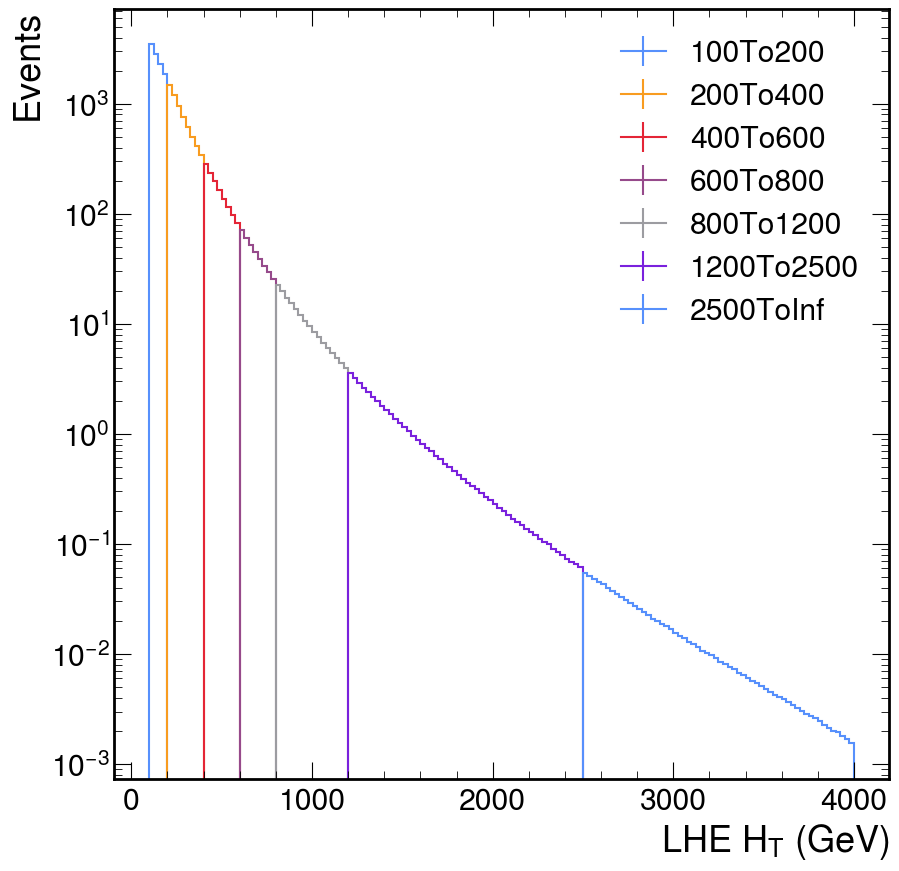

In [10]:
fig, ax = plt.subplots()
hep.histplot(lhe100To200, ax=ax, label="100To200")
hep.histplot(lhe200To400, ax=ax, label="200To400")
hep.histplot(lhe400To600, ax=ax, label="400To600")
hep.histplot(lhe600To800, ax=ax, label="600To800")
hep.histplot(lhe800To1200, ax=ax, label="800To1200")
hep.histplot(lhe1200To2500, ax=ax, label="1200To2500")
hep.histplot(lhe2500ToInf, ax=ax, label="2500ToInf")

ax.set_yscale("log")
ax.legend()
ax.set_xlabel(r"LHE $H_T$ (GeV)")
ax.set_ylabel("Events")
ax.set_yscale("log")

In [7]:
# lhe_2016preVFP = df.Filter("sample_year == \"2016preVFP\"").Histo1D(("LHE_HT", "LHE_HT", 390, 100, 4000), "LHE_HT", "weight")
# lhe_2016postVFP = df.Filter("sample_year == \"2016postVFP\"").Histo1D(("LHE_HT", "LHE_HT", 390, 100, 4000), "LHE_HT", "weight")
# lhe_2017 = df.Filter("sample_year == \"2017\"").Histo1D(("LHE_HT", "LHE_HT", 390, 100, 4000), "LHE_HT", "weight")
lhe_2018 = df.Filter("sample_year == \"2018\"").Histo1D(("LHE_HT", "LHE_HT", 390, 100, 4000), "LHE_HT", "weight")
# lhe_2016preVFP = lhe_2016preVFP.GetValue()
# lhe_2016postVFP = lhe_2016postVFP.GetValue()
# lhe_2017 = lhe_2017.GetValue()
lhe_2018 = lhe_2018.GetValue()

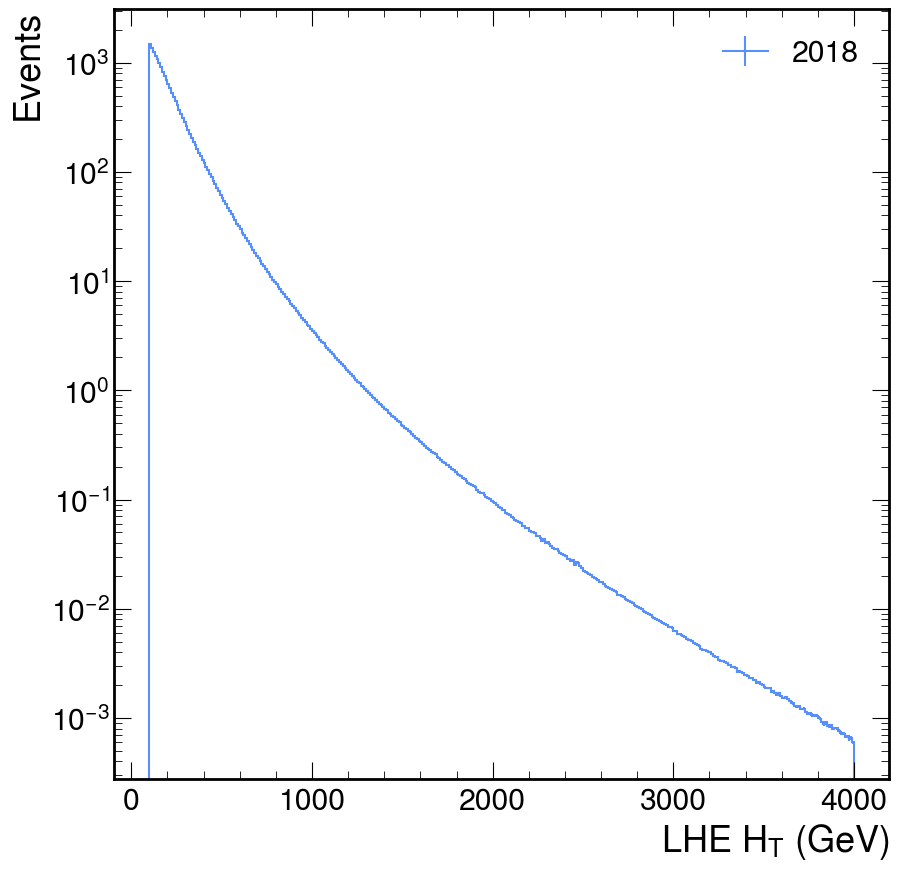

In [8]:
fig, ax = plt.subplots()
# hep.histplot(lhe_2016preVFP, ax=ax, label="2016preVFP")
# hep.histplot(lhe_2016postVFP, ax=ax, label="2016postVFP")
# hep.histplot(lhe_2017, ax=ax, label="2017")
hep.histplot(lhe_2018, ax=ax, label="2018")

ax.legend()
ax.set_xlabel(r"LHE $H_T$ (GeV)")
ax.set_ylabel("Events")
ax.set_yscale("log")